# 앱 단어구름분석

* 시놀 - 50대이상 친구만들기 & 취미찾기 중년 만남

In [1]:
import pandas as pd
from google_play_scraper import app
from google_play_scraper import Sort,reviews_all
import numpy as np
from kiwipiepy import Kiwi
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
sinor_reviews = reviews_all("com.sinor_app_front",
                      sleep_milliseconds=0,
                      lang = "ko",
                      country = "KR",
                      sort = Sort.NEWEST)

sinor_df = pd.DataFrame(np.array(sinor_reviews),columns=["review"])
sinor_df =sinor_df.join(pd.DataFrame(sinor_df.pop("review").to_list()))

In [3]:
sinor_df.to_csv('시놀리뷰.csv', encoding='utf-8-sig', index=False)

In [4]:
sinor_df = pd.read_csv("시놀리뷰.csv",usecols=["content","score"])
sinor_df

,content,score
0,광고 보고 다운받았는데 생각보다 좋네요. 일단 간편해서 좋습니다. 인증도 간단하고 ...,5
1,2 주 사용 후기 가입도 쉽고 자기 소개 작성도 순서대로 입력하면 어렵지 않았음. ...,5
2,젊은층이 아니라 50대이상도 이용할수 있는 만남어플이 나오니 좋습니다. 나이가 들수...,5
3,글씨도 큼직큼직하고 안내도 친절하여 혼자서 회원가입 하고 프로필 등록하는 것이 어렵...,5
4,설치부터 가입까지 복잡하지 않아요. 핸드폰 번호랑 인증번호만 입력하면 가입되는데 너...,5
...,...,...
157,인증이않오네요 m,1
158,좋아요,5
159,너무 좋습니다,3
160,좋습니다,4


In [5]:
kiwi = Kiwi()
sinor_result =  kiwi.analyze(sinor_df.content)
sinor_result

In [6]:
a=0
try:
    for idx,x in enumerate(sinor_result):
        print(x)
        a=idx
        print(a)
except:
    pass

[([Token(form='광고', tag='NNG', start=0, len=2), Token(form='보고', tag='NNG', start=3, len=2), Token(form='다운', tag='NNG', start=6, len=2), Token(form='받', tag='VV-R', start=8, len=1), Token(form='었', tag='EP', start=9, len=1), Token(form='는데', tag='EC', start=10, len=2), Token(form='생각', tag='NNG', start=13, len=2), Token(form='보다', tag='JKB', start=15, len=2), Token(form='좋', tag='VA', start=18, len=1), Token(form='네요', tag='EF', start=19, len=2), Token(form='.', tag='SF', start=21, len=1), Token(form='일단', tag='MAG', start=23, len=2), Token(form='간편하', tag='VA', start=26, len=3), Token(form='어서', tag='EC', start=28, len=2), Token(form='좋', tag='VA', start=31, len=1), Token(form='습니다', tag='EF', start=32, len=3), Token(form='.', tag='SF', start=35, len=1), Token(form='인증', tag='NNG', start=37, len=2), Token(form='도', tag='JX', start=39, len=1), Token(form='간단', tag='XR', start=41, len=2), Token(form='하', tag='XSA', start=43, len=1), Token(form='고', tag='EC', start=44, len=1), Token(for

In [7]:
def extract_keywords(text):
    text_filtered = re.sub('[^,.?!\w\s]','', text)
    sinor_result = kiwi.analyze(text_filtered)
    for token,pos,_,_ in sinor_result[0][0]:
        if pos in ['NNG', 'VA']:
            yield f'{token}/{pos}'

In [8]:
sinor_df.dropna(subset=['content'], inplace=True)

In [9]:
sinor_tfidf_vect = TfidfVectorizer(max_features= 1000, tokenizer=extract_keywords)
sinor_tfidf_dtm = sinor_tfidf_vect.fit_transform(sinor_df["content"])
sinor_features = sinor_tfidf_vect.get_feature_names_out()
sinor_feature_count = sinor_tfidf_dtm.toarray().sum(axis = 0)
sinor_tfidf_dic = dict(zip(sinor_features, sinor_feature_count))
# tfidf_df = pd.DataFrame({"words": features, "tfidf_value": feature_count})
sinor_tfidf_dic

C:\Users\SSO\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'가능/NNG': 1.4046083966151364,
 '가입/NNG': 5.592367806473709,
 '가입자/NNG': 0.6111285553069776,
 '가짜/NNG': 0.27680863937361866,
 '간결하/VA': 0.23048215483613263,
 '간편하/VA': 0.7055527710052294,
 '감동/NNG': 0.31508936252571546,
 '감사/NNG': 1.0624598669740786,
 '강력/NNG': 0.5114620530807659,
 '같/VA': 8.60447148124716,
 '개발/NNG': 0.3308997813364862,
 '개인/NNG': 0.4570315067159267,
 '거리/NNG': 0.4477936376388022,
 '거절/NNG': 0.3129576476007297,
 '건전/NNG': 0.6120481809452872,
 '걸맞/VA': 0.2947822621148767,
 '결재/NNG': 0.3308997813364862,
 '결제/NNG': 1.0317765928308384,
 '결혼/NNG': 0.7669501796684901,
 '경찰/NNG': 0.22231507643932444,
 '경험/NNG': 0.8262973257494013,
 '경험자/NNG': 0.4105188625686463,
 '계정/NNG': 0.519476478215172,
 '고객/NNG': 0.4914354584320742,
 '고민/NNG': 0.31508936252571546,
 '곳/NNG': 1.1772446060055846,
 '공간/NNG': 1.1592795310743382,
 '공감/NNG': 0.4150722266962269,
 '공유/NNG': 0.5181395489320182,
 '관리/NNG': 0.45802550494874583,
 '관심사/NNG': 0.5613853556197812,
 '광고/NNG': 1.058197875533716,
 '괜찬/VA'

In [10]:
sinor_sorted_dic = dict(sorted(sinor_tfidf_dic.items(), key=lambda item: item[1], reverse=True))
sinor_top_100 = dict(list(sinor_sorted_dic.items())[:100])
sinor_top_100

{'좋/VA': 15.758455095175798,
 '친구/NNG': 10.40493566777766,
 '있/VA': 10.1431902793385,
 '앱/NNG': 9.227253216779559,
 '같/VA': 8.60447148124716,
 '어플/NNG': 7.060577537251568,
 '이용/NNG': 6.788114679963267,
 '많/VA': 6.129607242935297,
 '사람/NNG': 6.0380548193891475,
 '가입/NNG': 5.592367806473709,
 '대화/NNG': 5.58916255326187,
 '없/VA': 5.254076021225201,
 '사용/NNG': 4.745676460969586,
 '추천/NNG': 4.676944422433414,
 '무료/NNG': 4.490399187454513,
 '중년/NNG': 4.358942782771428,
 '나이/NNG': 4.319464581048445,
 '재밌/VA': 3.9368724412955944,
 '서비스/NNG': 3.8475117564850545,
 '찜/NNG': 3.6866884676326226,
 '사진/NNG': 3.594250955910415,
 '생각/NNG': 3.5834484800445203,
 '놀/NNG': 3.4921911767546985,
 '만남/NNG': 3.436661405705939,
 '취미/NNG': 3.3351426576528223,
 '단짝/NNG': 3.3329927673194057,
 '시/NNG': 3.3280109489436693,
 '크/VA': 3.29473348058669,
 '주변/NNG': 3.1045180839048707,
 '때/NNG': 3.063636283950951,
 '다양/NNG': 2.805583588153209,
 '회원/NNG': 2.796029548352347,
 '매칭/NNG': 2.651621658274237,
 '동네/NNG': 2.5602745

In [11]:
sinor_word_cloud_dic = {}
for key in sinor_tfidf_dic.keys():
    if key.endswith(("NNG")):
        sinor_new_key =  key.split("/")[0]
        sinor_count = sinor_tfidf_dic[key]
        sinor_word_cloud_dic[sinor_new_key] = sinor_count
    else:
        continue
sinor_word_cloud_dic

{'가능': 1.4046083966151364,
 '가입': 5.592367806473709,
 '가입자': 0.6111285553069776,
 '가짜': 0.27680863937361866,
 '감동': 0.31508936252571546,
 '감사': 1.0624598669740786,
 '강력': 0.5114620530807659,
 '개발': 0.3308997813364862,
 '개인': 0.4570315067159267,
 '거리': 0.4477936376388022,
 '거절': 0.3129576476007297,
 '건전': 0.6120481809452872,
 '결재': 0.3308997813364862,
 '결제': 1.0317765928308384,
 '결혼': 0.7669501796684901,
 '경찰': 0.22231507643932444,
 '경험': 0.8262973257494013,
 '경험자': 0.4105188625686463,
 '계정': 0.519476478215172,
 '고객': 0.4914354584320742,
 '고민': 0.31508936252571546,
 '곳': 1.1772446060055846,
 '공간': 1.1592795310743382,
 '공감': 0.4150722266962269,
 '공유': 0.5181395489320182,
 '관리': 0.45802550494874583,
 '관심사': 0.5613853556197812,
 '광고': 1.058197875533716,
 '구걸': 0.4093182574037778,
 '구독': 0.22224296796770462,
 '구조': 0.5206077552180394,
 '굿': 1.9703012192189888,
 '굿굿': 0.5197314674067215,
 '그때': 0.2903637190898559,
 '글': 0.23048215483613263,
 '글씨': 2.329649411616421,
 '글씨체': 0.520607755218039

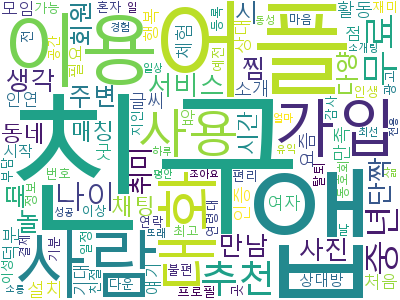

In [12]:
sinor_wc = WordCloud(background_color="white",font_path="C:\Windows\Fonts\malgun.ttf", max_words=100, width=400, height=300)
sinor_cloud = sinor_wc.fit_words(sinor_word_cloud_dic)
sinor_cloud.to_image()

* 시니어톡톡 - 주야간보호/방문요양 노인돌봄 커뮤니케이션

In [13]:
stt_ai_reviews = reviews_all("com.liveoninc.stt_app",
                      sleep_milliseconds=0,
                      lang = "ko",
                      country = "KR",
                      sort = Sort.NEWEST)

stt_ai_df = pd.DataFrame(np.array(stt_ai_reviews),columns=["review"])
stt_ai_df = stt_ai_df.join(pd.DataFrame(stt_ai_df.pop("review").to_list()))

In [14]:
stt_ai_df.to_csv('시니어톡톡리뷰.csv', encoding='utf-8-sig', index=False)

In [15]:
stt_ai_df = pd.read_csv("시니어톡톡리뷰.csv",usecols=["content","score"])
stt_ai_df

,content,score
0,"집 근처 요양시설을 알아보고 있었는데 지도 검색, 지역 검색이 가능해서 편하게 이용...",5
1,"할머니 건강 문제로 장기요양에 대해 알아보게 되면서 어떤 기관이 좋을지, 어떤 요양...",5
2,어르신이 치매가 있으셔서 어떻게 해야 할지 막막 해서 이리 저리 알아보다 앱 발견해...,5
3,여기저기 요양병원 검색하다가 어플이 있길래 다운 받아서 보고 있는중입니다. 정리가 ...,5
4,노인요양등급 등급을 미리 알 수 있어서 좋네요. 비용 예상을 미리 할 수 있는 기능...,5
5,좋은앱 만들어주셔서 감사합니다. 잘 쓰겠습니다.,5
6,요양관련 정보를 찾는데 많은 도움이 되네요...,5
7,공주님 그 공주님 그림 그림 공주님 그림 그림,5


In [16]:
kiwi = Kiwi()
stt_ai_result =  kiwi.analyze(stt_ai_df.content)
stt_ai_result

In [17]:
a=0
try:
    for idx,x in enumerate(stt_ai_result):
        print(x)
        a=idx
        print(a)
except:
    pass

[([Token(form='집', tag='NNG', start=0, len=1), Token(form='근처', tag='NNG', start=2, len=2), Token(form='요양', tag='NNG', start=5, len=2), Token(form='시설', tag='NNG', start=7, len=2), Token(form='을', tag='JKO', start=9, len=1), Token(form='알아보', tag='VV', start=11, len=3), Token(form='고', tag='EC', start=14, len=1), Token(form='있', tag='VX', start=16, len=1), Token(form='었', tag='EP', start=17, len=1), Token(form='는데', tag='EC', start=18, len=2), Token(form='지도', tag='NNG', start=21, len=2), Token(form='검색', tag='NNG', start=24, len=2), Token(form=',', tag='SP', start=26, len=1), Token(form='지역', tag='NNG', start=28, len=2), Token(form='검색', tag='NNG', start=31, len=2), Token(form='이', tag='JKS', start=33, len=1), Token(form='가능', tag='NNG', start=35, len=2), Token(form='하', tag='XSA', start=37, len=1), Token(form='어서', tag='EC', start=37, len=2), Token(form='편', tag='XR', start=40, len=1), Token(form='하', tag='XSA', start=41, len=1), Token(form='게', tag='EC', start=42, len=1), Token(for

In [18]:
def extract_keywords(text):
    text_filtered = re.sub('[^,.?!\w\s]','', text)
    stt_ai_result = kiwi.analyze(text_filtered)
    for token,pos,_,_ in stt_ai_result[0][0]:
        if pos in ['NNG', 'VA']:
            yield f'{token}/{pos}'

In [19]:
stt_ai_df.dropna(subset=['content'], inplace=True)

In [20]:
stt_ai_tfidf_vect = TfidfVectorizer(max_features= 1000, tokenizer=extract_keywords)
stt_ai_tfidf_dtm = stt_ai_tfidf_vect.fit_transform(stt_ai_df["content"])
stt_ai_features = stt_ai_tfidf_vect.get_feature_names_out()
stt_ai_feature_count = stt_ai_tfidf_dtm.toarray().sum(axis = 0)
stt_ai_tfidf_dic = dict(zip(stt_ai_features, stt_ai_feature_count))
# tfidf_df = pd.DataFrame({"words": features, "tfidf_value": feature_count})
stt_ai_tfidf_dic

C:\Users\SSO\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'가능/NNG': 0.1545535812286813,
 '가족/NNG': 0.30442961952888364,
 '감사/NNG': 0.8047812612655276,
 '같/VA': 0.1545535812286813,
 '건강/NNG': 0.19157666673290294,
 '검색/NNG': 0.7207989052574495,
 '계산기/NNG': 0.1545535812286813,
 '공주/NNG': 0.6,
 '관련/NNG': 0.5609955394694522,
 '그림/NNG': 0.7999999999999999,
 '근처/NNG': 0.1545535812286813,
 '기관/NNG': 0.3831533334658059,
 '기능/NNG': 0.4171491610335778,
 '기대/NNG': 0.1545535812286813,
 '내용/NNG': 0.30442961952888364,
 '노인/NNG': 0.34319142430128713,
 '다양/NNG': 0.3348670412165783,
 '다운/NNG': 0.30442961952888364,
 '단축/NNG': 0.1545535812286813,
 '대략/NNG': 0.1545535812286813,
 '도움/NNG': 0.880836200942262,
 '등급/NNG': 0.9970246499574416,
 '많/VA': 0.6946705978231458,
 '모의/NNG': 0.19157666673290294,
 '문제/NNG': 0.19157666673290294,
 '발견/NNG': 0.24501188084528755,
 '방법/NNG': 0.36589527632767993,
 '병원/NNG': 0.4604748583545877,
 '부모/NNG': 0.24501188084528755,
 '비용/NNG': 0.5371562758289157,
 '상담/NNG': 0.1545535812286813,
 '상태/NNG': 0.24501188084528755,
 '선택/NNG': 0.154

In [21]:
stt_ai_sorted_dic = dict(sorted(stt_ai_tfidf_dic.items(), key=lambda item: item[1], reverse=True))
stt_ai_top_100 = dict(list(stt_ai_sorted_dic.items())[:100])
stt_ai_top_100

{'요양/NNG': 1.4901589697540658,
 '좋/VA': 1.1175147783050574,
 '등급/NNG': 0.9970246499574416,
 '있/VA': 0.9080530982888868,
 '앱/NNG': 0.8984257945951306,
 '도움/NNG': 0.880836200942262,
 '정보/NNG': 0.858741934358524,
 '감사/NNG': 0.8047812612655276,
 '그림/NNG': 0.7999999999999999,
 '검색/NNG': 0.7207989052574495,
 '많/VA': 0.6946705978231458,
 '정리/NNG': 0.6088592390577673,
 '공주/NNG': 0.6,
 '관련/NNG': 0.5609955394694522,
 '비용/NNG': 0.5371562758289157,
 '병원/NNG': 0.4604748583545877,
 '테스트/NNG': 0.42750960673698946,
 '시설/NNG': 0.4196121246207528,
 '기능/NNG': 0.4171491610335778,
 '기관/NNG': 0.3831533334658059,
 '장기/NNG': 0.3831533334658059,
 '방법/NNG': 0.36589527632767993,
 '노인/NNG': 0.34319142430128713,
 '예상/NNG': 0.34319142430128713,
 '참고/NNG': 0.34319142430128713,
 '다양/NNG': 0.3348670412165783,
 '가족/NNG': 0.30442961952888364,
 '내용/NNG': 0.30442961952888364,
 '다운/NNG': 0.30442961952888364,
 '어플/NNG': 0.30442961952888364,
 '여기저기/NNG': 0.30442961952888364,
 '지역/NNG': 0.2900841614508691,
 '발견/NNG': 0.245011

In [22]:
stt_ai_word_cloud_dic = {}
for key in stt_ai_tfidf_dic.keys():
    if key.endswith(("NNG")):
        stt_ai_new_key =  key.split("/")[0]
        stt_ai_count = stt_ai_tfidf_dic[key]
        stt_ai_word_cloud_dic[stt_ai_new_key] = stt_ai_count
    else:
        continue
stt_ai_word_cloud_dic

{'가능': 0.1545535812286813,
 '가족': 0.30442961952888364,
 '감사': 0.8047812612655276,
 '건강': 0.19157666673290294,
 '검색': 0.7207989052574495,
 '계산기': 0.1545535812286813,
 '공주': 0.6,
 '관련': 0.5609955394694522,
 '그림': 0.7999999999999999,
 '근처': 0.1545535812286813,
 '기관': 0.3831533334658059,
 '기능': 0.4171491610335778,
 '기대': 0.1545535812286813,
 '내용': 0.30442961952888364,
 '노인': 0.34319142430128713,
 '다양': 0.3348670412165783,
 '다운': 0.30442961952888364,
 '단축': 0.1545535812286813,
 '대략': 0.1545535812286813,
 '도움': 0.880836200942262,
 '등급': 0.9970246499574416,
 '모의': 0.19157666673290294,
 '문제': 0.19157666673290294,
 '발견': 0.24501188084528755,
 '방법': 0.36589527632767993,
 '병원': 0.4604748583545877,
 '부모': 0.24501188084528755,
 '비용': 0.5371562758289157,
 '상담': 0.1545535812286813,
 '상태': 0.24501188084528755,
 '선택': 0.1545535812286813,
 '시간': 0.1545535812286813,
 '시니어': 0.19157666673290294,
 '시설': 0.4196121246207528,
 '앞': 0.1545535812286813,
 '앱': 0.8984257945951306,
 '어르신': 0.24501188084528755,
 '어

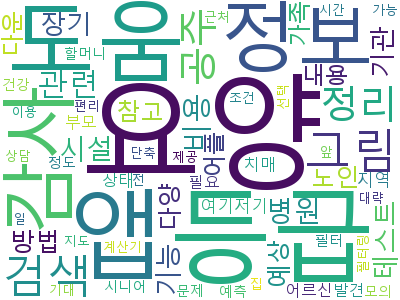

In [23]:
stt_ai_wc = WordCloud(background_color="white",font_path="C:\Windows\Fonts\malgun.ttf", max_words=100, width=400, height=300)
stt_ai_cloud = stt_ai_wc.fit_words(stt_ai_word_cloud_dic)
stt_ai_cloud.to_image()

* 메모핏 시니어 헬스케어 플랫폼

In [27]:
memofit_reviews = reviews_all("com.browny.memofit",
                      sleep_milliseconds=0,
                      lang = "ko",
                      country = "KR",
                      sort = Sort.NEWEST)

memofit_df = pd.DataFrame(np.array(memofit_reviews),columns=["review"])
memofit_df = memofit_df.join(pd.DataFrame(memofit_df.pop("review").to_list()))

In [28]:
memofit_df.to_csv('메모핏리뷰.csv', encoding='utf-8-sig', index=False)

In [29]:
memofit_df = pd.read_csv("메모핏리뷰.csv",usecols=["content","score"])
memofit_df

,content,score
0,베타버전때부터 사용해왔는데 디자인도 깔끔해지고 마음에들어요,5
1,"주3,4회 정도 꼭하는데 체력 좋아지는 느낌 듭니다!!",5
2,걷기만하다 메모핏 사용하여 근육강화하니 더 건강해주는 느낌이네요!,5
3,병원서 근력운동 꼭하라해서 이용하게 되었습니다,5
4,베타버전때부터 사용해왔는데 디자인도 깔끔해지고 마음에들어요 ㅎㅎ,5
5,광고 없어서 운동 쉬지 않고 따라 할 수 있습니다,5
6,잘 쓰고 있어요 가끔 기구필요할때 당황하지만요,4
7,어머님이 너무 좋아하세요!! 심히 운동 하셔서 저도 너무 좋구요,5
8,개인 맞춤이라 무리없이 운동할수 있어요,5
9,건강검진하고 근력 부족하다고여서 고민하니 딸이 검색해서 알려주셨어요^^,5


In [30]:
kiwi = Kiwi()
memofit_result =  kiwi.analyze(memofit_df.content)
memofit_result

In [31]:
a=0
try:
    for idx,x in enumerate(memofit_result):
        print(x)
        a=idx
        print(a)
except:
    pass

[([Token(form='베타', tag='NNG', start=0, len=2), Token(form='버전', tag='NNG', start=2, len=2), Token(form='때', tag='NNG', start=4, len=1), Token(form='부터', tag='JX', start=5, len=2), Token(form='사용', tag='NNG', start=8, len=2), Token(form='하', tag='XSV', start=10, len=1), Token(form='어', tag='EC', start=10, len=1), Token(form='오', tag='VX', start=11, len=1), Token(form='었', tag='EP', start=11, len=1), Token(form='는데', tag='EC', start=12, len=2), Token(form='디자인', tag='NNG', start=15, len=3), Token(form='도', tag='JX', start=18, len=1), Token(form='깔끔', tag='NNG', start=20, len=2), Token(form='하', tag='XSA', start=22, len=1), Token(form='어', tag='EC', start=22, len=1), Token(form='지', tag='VX', start=23, len=1), Token(form='고', tag='EC', start=24, len=1), Token(form='마음', tag='NNG', start=26, len=2), Token(form='에', tag='JKB', start=28, len=1), Token(form='들', tag='VV', start=29, len=1), Token(form='어요', tag='EF', start=30, len=2)], -100.73047637939453)]
0
[([Token(form='주', tag='NNG', sta

In [32]:
def extract_keywords(text):
    text_filtered = re.sub('[^,.?!\w\s]','', text)
    memofit_result = kiwi.analyze(text_filtered)
    for token,pos,_,_ in memofit_result[0][0]:
        if pos in ['NNG', 'VA']:
            yield f'{token}/{pos}'

In [33]:
memofit_df.dropna(subset=['content'], inplace=True)

In [34]:
memofit_tfidf_vect = TfidfVectorizer(max_features= 1000, tokenizer=extract_keywords)
memofit_tfidf_dtm = memofit_tfidf_vect.fit_transform(memofit_df["content"])
memofit_features = memofit_tfidf_vect.get_feature_names_out()
memofit_feature_count = memofit_tfidf_dtm.toarray().sum(axis = 0)
memofit_tfidf_dic = dict(zip(memofit_features, memofit_feature_count))
# tfidf_df = pd.DataFrame({"words": features, "tfidf_value": feature_count})
memofit_tfidf_dic

C:\Users\SSO\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'감사/NNG': 0.5100474648179987,
 '강화/NNG': 0.45038960022206764,
 '같/VA': 1.1519008565378597,
 '개인/NNG': 0.5203505140983695,
 '건강/NNG': 1.5620240703009434,
 '검색/NNG': 0.39839041596228936,
 '검진/NNG': 0.39839041596228936,
 '결과/NNG': 0.6093434310850301,
 '고민/NNG': 0.39839041596228936,
 '광고/NNG': 0.6093434310850301,
 '근력/NNG': 0.7889278726012702,
 '근육/NNG': 0.45038960022206764,
 '기구/NNG': 0.5249270021222106,
 '깔끔/NNG': 0.7768262162873725,
 '느낌/NNG': 0.8388839489505229,
 '당황/NNG': 0.5249270021222106,
 '등산/NNG': 0.4487592741302658,
 '디자인/NNG': 0.7768262162873725,
 '딸/NNG': 0.39839041596228936,
 '때/NNG': 1.1173245912863368,
 '마음/NNG': 0.7768262162873725,
 '많/VA': 0.32044890028409095,
 '맞춤/NNG': 0.5203505140983695,
 '메모핏/NNG': 0.45038960022206764,
 '몸/NNG': 0.5693073961822062,
 '무리/NNG': 0.5203505140983695,
 '믿음/NNG': 0.6093434310850301,
 '버전/NNG': 0.7768262162873725,
 '베타/NNG': 0.7768262162873725,
 '병원/NNG': 0.4991228204038591,
 '보름/NNG': 0.4487592741302658,
 '본인/NNG': 0.5693073961822062,
 '부족/

In [35]:
# <locate the top 100 words>
memofit_sorted_dic = dict(sorted(memofit_tfidf_dic.items(), key=lambda item: item[1], reverse=True))
memofit_top_100 = dict(list(memofit_sorted_dic.items())[:100])
memofit_top_100

{'운동/NNG': 3.7858992501732343,
 '좋/VA': 2.3019970729039505,
 '있/VA': 1.8944967888159958,
 '건강/NNG': 1.5620240703009434,
 '같/VA': 1.1519008565378597,
 '때/NNG': 1.1173245912863368,
 '사용/NNG': 1.0582033651376004,
 '체력/NNG': 0.9939494466501135,
 '느낌/NNG': 0.8388839489505229,
 '엄마/NNG': 0.8326443385261592,
 '근력/NNG': 0.7889278726012702,
 '어머님/NNG': 0.7824152829670079,
 '깔끔/NNG': 0.7768262162873725,
 '디자인/NNG': 0.7768262162873725,
 '마음/NNG': 0.7768262162873725,
 '버전/NNG': 0.7768262162873725,
 '베타/NNG': 0.7768262162873725,
 '수건/NNG': 0.6408978005681819,
 '요즘/NNG': 0.6267977885019439,
 '결과/NNG': 0.6093434310850301,
 '광고/NNG': 0.6093434310850301,
 '믿음/NNG': 0.6093434310850301,
 '없/VA': 0.6093434310850301,
 '몸/NNG': 0.5693073961822062,
 '본인/NNG': 0.5693073961822062,
 '앱/NNG': 0.5418330401760026,
 '처음/NNG': 0.5418330401760026,
 '시간/NNG': 0.5324019036382708,
 '투자/NNG': 0.5324019036382708,
 '하루/NNG': 0.5324019036382708,
 '기구/NNG': 0.5249270021222106,
 '당황/NNG': 0.5249270021222106,
 '필요/NNG': 0.5249

In [36]:
# <remove "NNG" and "VA" >
memofit_word_cloud_dic = {}
for key in memofit_tfidf_dic.keys():
    if key.endswith("NNG"):
        memofit_new_key =  key.split("/")[0]
        memofit_count = memofit_tfidf_dic[key]
        memofit_word_cloud_dic[memofit_new_key] = memofit_count
    else:
        continue
memofit_word_cloud_dic

{'감사': 0.5100474648179987,
 '강화': 0.45038960022206764,
 '개인': 0.5203505140983695,
 '건강': 1.5620240703009434,
 '검색': 0.39839041596228936,
 '검진': 0.39839041596228936,
 '결과': 0.6093434310850301,
 '고민': 0.39839041596228936,
 '광고': 0.6093434310850301,
 '근력': 0.7889278726012702,
 '근육': 0.45038960022206764,
 '기구': 0.5249270021222106,
 '깔끔': 0.7768262162873725,
 '느낌': 0.8388839489505229,
 '당황': 0.5249270021222106,
 '등산': 0.4487592741302658,
 '디자인': 0.7768262162873725,
 '딸': 0.39839041596228936,
 '때': 1.1173245912863368,
 '마음': 0.7768262162873725,
 '맞춤': 0.5203505140983695,
 '메모핏': 0.45038960022206764,
 '몸': 0.5693073961822062,
 '무리': 0.5203505140983695,
 '믿음': 0.6093434310850301,
 '버전': 0.7768262162873725,
 '베타': 0.7768262162873725,
 '병원': 0.4991228204038591,
 '보름': 0.4487592741302658,
 '본인': 0.5693073961822062,
 '부족': 0.39839041596228936,
 '사용': 1.0582033651376004,
 '산책': 0.4487592741302658,
 '서': 0.4991228204038591,
 '수건': 0.6408978005681819,
 '시간': 0.5324019036382708,
 '앱': 0.54183304017600

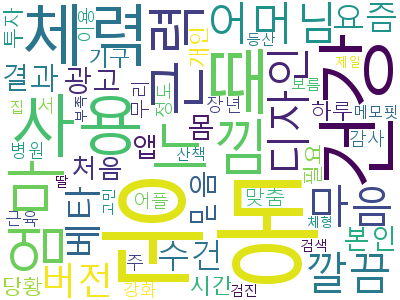

In [37]:
# <word cloud>
memofit_wc = WordCloud(background_color="white",font_path="C:\Windows\Fonts\malgun.ttf", max_words=100, width=400, height=300)
memofit_cloud = memofit_wc.fit_words(memofit_word_cloud_dic)
memofit_cloud.to_image()